In [1]:
import pandas as pd

Read the data

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv').to_numpy().ravel()

X_test = pd.read_csv('data/X_test.csv')
y_test = pd.read_csv('data/y_test.csv').to_numpy().ravel()

In [3]:
X_train.head()

,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,0.0,1.0,0.0,0.0,0.0,0.0,0.221831,0.209091,0.266815,0.314607,0.144050,0.951220,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.151408,0.100000,0.226682,0.325843,0.085595,0.536585,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.246479,0.136364,0.162765,0.123596,0.181628,0.170732,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.040493,0.036364,0.049424,0.078652,0.025052,0.390244,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.906690,0.954545,0.969528,0.865169,0.674322,0.073171,0.0


Prediction

In [4]:
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show

ebm = ExplainableBoostingClassifier(interactions=0)
ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(interactions=0)

In [5]:
ebm.term_scores_[0]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.01609279,  0.01136593, -0.01807343,  0.02049368,  0.00245109],
       [ 0.06437115, -0.04546373,  0.07229371, -0.08197471, -0.00980435],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [6]:
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7877/1157191177072/ -->

In [ ]:
ebm_local = ebm.explain_local(X_test, y_test)

show(ebm_local)

<!-- http://127.0.0.1:7877/1157222932688/ -->

1.0

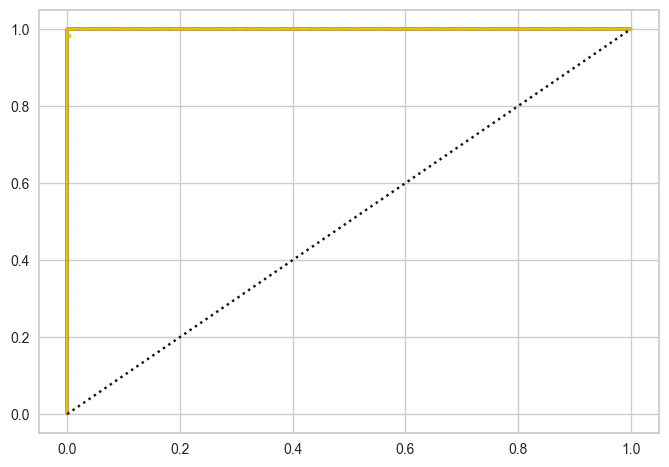

In [ ]:
visualizer = ROCAUC(ebm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

c:\Users\javip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



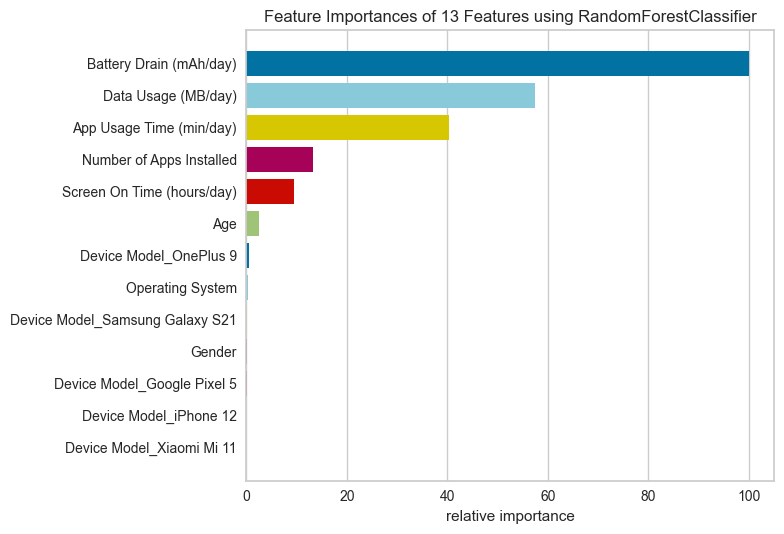

<AxesSubplot:title={'center':'Feature Importances of 13 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(clf, )
viz.fit(X_train, y_train)
viz.show()

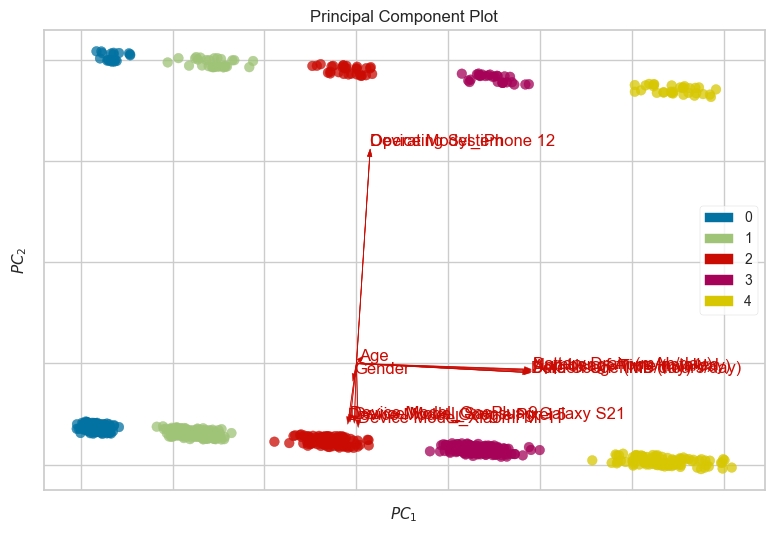

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.features import PCA

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X_train, y_train_encoded)
visualizer.show()

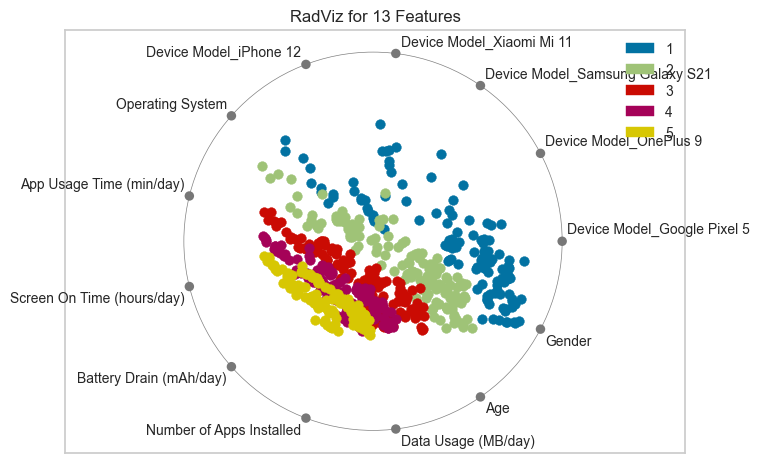

<AxesSubplot:title={'center':'RadViz for 13 Features'}>

In [ ]:
from yellowbrick.features import RadViz

visualizer = RadViz(classes=label_encoder.classes_, features=X_train.columns)
visualizer.fit_transform(X_train, y_train_encoded)
visualizer.show()

c:\Users\javip\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



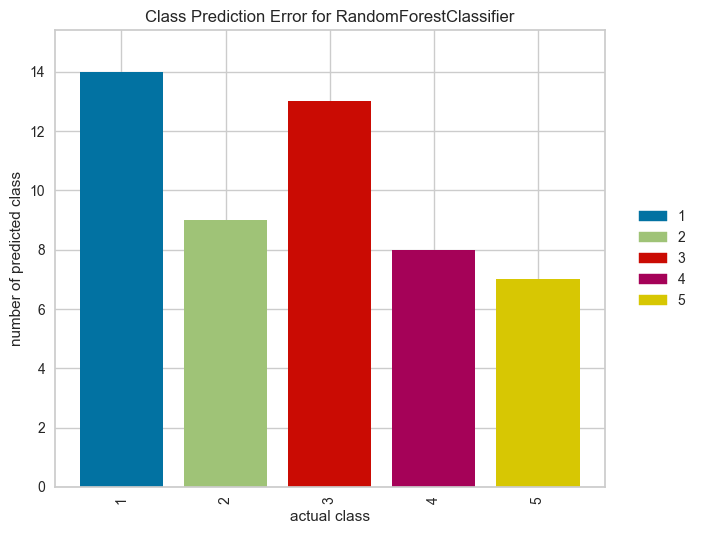

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [ ]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(clf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

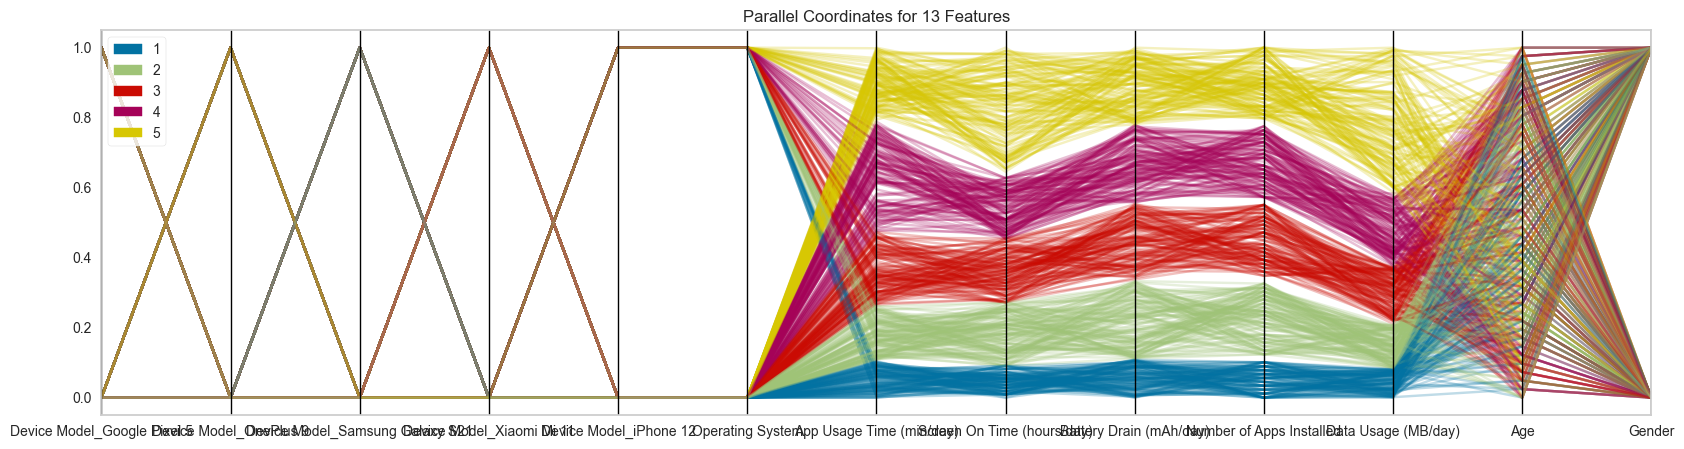

<AxesSubplot:title={'center':'Parallel Coordinates for 13 Features'}>

In [ ]:
from yellowbrick.features import ParallelCoordinates
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

visualizer = ParallelCoordinates(
    classes=label_encoder.classes_,
    features=X_train.columns
)

visualizer.fit_transform(X_train, y_train_encoded)
visualizer.show()